# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Airta Pertiwi]
- **Email:** [airtapertiwi870@gmail.com]
- **ID Dicoding:** [airtaprtw]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Seperti apa tipe pengguna Bike Sharing dalam aktivitas sehari-hari?
- Pertanyaan 2 : Bagaimana tingkatan produktivitas penggunaan Bike Sharing selama 24 jam?
- Pertanyaan 3 : Jelaskan apakah kondisi cuaca dan musim mempengaruhi jumlah penggunaan Bike Sharing?

## Import Semua Packages/Library yang Digunakan

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## Data Wrangling (Pengumpulan Data)

### Gathering Data

In [65]:
day = pd.read_csv('Data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [66]:
hour = pd.read_csv('Data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Gathering data untuk mengumpulkan dan membaca terlebih dahulu isi dari dataset csv "day" dan "hour" yang ada pada folder data.
- Untuk **day.csv** berisi dataset per-hari, sementara **hour.csv** berisi dataset per-jam.

### Assessing Data (Pemeriksaan Data)

**Informasi Variabel Dataset**
- instant: indeks pencatatan
- dteday : tanggal
- season : musim (1:spring "semi", 2:summer "panas", 3:fall "gugur", 4:winter "dingin")
- yr : tahun (0: 2011, 1:2012)
- mnth : bulan ( 1 to 12)
- hr : jam (0 to 23)
- holiday : apakah hari tersebut hari libur atau bukan
- weekday : hari dalam minggu (Senin hingga Minggu)
- workingday : jika hari tersebut bukan akhir pekan atau hari libur, bernilai 1; jika akhir pekan atau hari libur, bernilai 0.
- weathersit : kondisi cuaca
     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
     - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
     - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
     - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : suhu normal dalam Celsius. Nilai dihitung dengan rumus (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hanya dalam skala jam)
- atemp: suhu terasa dalam Celsius yang telah dinormalisasi. Nilai dihitung dengan rumus (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hanya dalam skala jam)
- hum: kelembaban yang dinormalisasi. Nilai dibagi dengan 100 (maksimal)
- windspeed: kecepatan angin yang dinormalisasi. Nilai dibagi dengan 67 (maksimal)
- casual: jumlah pengguna tidak terdaftar
- registered: jumlah pengguna terdaftar
- cnt: jumlah total sepeda yang disewa, termasuk jumlah pengguna tidak terdaftar (casual) dan terdaftar (registered).

### Day Dataframe

In [67]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengidentifikasi duplikasi di dalam DataFrame "Day". Baris-baris yang memiliki duplikasi akan diberi nilai True, sementara yang lainnya akan diberi nilai False.

In [68]:
print('Number of duplications: ', day.duplicated().sum())
day.describe()

Number of duplications:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Hour Dataframe

In [69]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengidentifikasi duplikasi di dalam DataFrame Hour. Baris-baris yang memiliki duplikasi akan diberi nilai True, sementara yang lainnya akan diberi nilai False.

In [70]:
print('Number of duplications: ', hour.duplicated().sum())
hour.describe()

Number of duplications:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### Day Dataframe
Menghapus kolom "holiday", karena informasi pada kolom holiday sudah direpresentasikan dengan isi kolom "workingday" yaitu terdapat nilai:
- 1 (hari tidak libur)
- 0 (hari libur/holiday)

In [71]:
day.drop(['holiday'], axis=1, inplace=True)

**Mengganti beberapa kolom judul header untuk lebih mudah dipahami dan menghindari eror**

In [72]:
day.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

Mengganti tipe data kolom "date" dari object ke datetime.

In [73]:
datetime_columns = ['date']

for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

In [74]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   date              731 non-null    datetime64[ns]
 2   season            731 non-null    int64         
 3   year              731 non-null    int64         
 4   month             731 non-null    int64         
 5   day               731 non-null    int64         
 6   workingday        731 non-null    int64         
 7   weather           731 non-null    int64         
 8   temperature       731 non-null    float64       
 9   temperature_feel  731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual_user       731 non-null    int64         
 13  registered_user   731 non-null    int64         
 14  total_user        731 non-

Mengkonversi "season" dari numeric menjadi makna yang sebenarnya agar lebih jelas. Masing-masing nomor merepresentasikan:
- 1 : spring
- 2 : summer
- 3 : fall
- 4 : winter

In [75]:
def change_season(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

day['season'] = day['season'].apply(change_season)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah "year" dari numeric, menjadi nama tahun yang sebenarnya:
- 0 adalah 2011
- 1 adalah 2012

In [76]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

day['year'] = day['year'].apply(change_year)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,2011,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengganti data kolom "month" dari numeric (1-12) menjadi nama bulan yang sesuai.

In [77]:
month_change = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

day['month'] = day['month'].map(month_change)
day.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,2011,january,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,january,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,january,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,january,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,january,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengkonversi data "weekday" menjadi nama hari yang sebenarnya.

In [78]:
day_change = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

day['day'] = day['day'].map(day_change)
day.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,2011,january,sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,january,monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,january,tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,january,wednesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,january,thursday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data pada "working days" yang sebelumnya berbentuk numeric (1/0), untuk kemudian dikonversi menjadi:
- 0 adalah weekend/holiday
- 1 adalah working day.

In [79]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

day['workingday'] = day['workingday'].apply(change_workingday)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,2011,january,sunday,weekend/holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,january,monday,weekend/holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,january,tuesday,working day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,january,wednesday,working day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,january,thursday,working day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah data "weather" ke dalam representasi yang sesuai:
- 1 adalah clear
- 2 adalah mist
- 3 adalah light snow
- 4 adalah heavy rain

In [80]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

day['weather'] = day['weather'].apply(change_weather)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,2011,january,sunday,weekend/holiday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,january,monday,weekend/holiday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,january,tuesday,working day,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,january,wednesday,working day,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,january,thursday,working day,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Hour Dataframe
Menghapus kolom "holiday" karena informasi pada kolom "holiday" telah direpresentasikan dengan isi kolom "workingday" yaitu terdapat nilai:
- 1 (hari tidak libur)
- 0 (hari libur/holiday)

In [81]:
hour.drop(['holiday'], axis=1, inplace=True)

**Mengganti beberapa kolom judul header untuk lebih mudah dipahami dan menghindari eror**

In [82]:
hour.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weekday':'day',
                    'weathersit':'weather', 'temp':'temperature', 'atemp':'temperature_feel',
                    'hum':'humidity', 'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

Mengubah tipe data "date" dari object menjadi datetime.

In [83]:
datetime_columns = ['date']

for column in datetime_columns:
  hour[column] = pd.to_datetime(hour[column])

In [84]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   date              17379 non-null  datetime64[ns]
 2   season            17379 non-null  int64         
 3   year              17379 non-null  int64         
 4   month             17379 non-null  int64         
 5   hour              17379 non-null  int64         
 6   day               17379 non-null  int64         
 7   workingday        17379 non-null  int64         
 8   weather           17379 non-null  int64         
 9   temperature       17379 non-null  float64       
 10  temperature_feel  17379 non-null  float64       
 11  humidity          17379 non-null  float64       
 12  windspeed         17379 non-null  float64       
 13  casual_user       17379 non-null  int64         
 14  registered_user   1737

Mengkonversi "season" dari numeric (1-4) menjadi makna yang sebenarnya. Masing-masing nomor merepresentasikan:
- 1 : spring
- 2 : summer
- 3 : fall
- 4 : winter

In [85]:
def change_season(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

hour['season'] = hour['season'].apply(change_season)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data "year" dengan representasi tahun yang sesuai:
- 0 adalah 2011
- 1 adalah 2012

In [86]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

hour['year'] = hour['year'].apply(change_year)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,2011,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,1,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,1,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,1,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,1,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data "month" dengan nama bulan yang sesuai.

In [87]:
month_change = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

hour['month'] = hour['month'].map(month_change)
hour.head(5)

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,2011,january,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data "weekday" menjadi nama hari yang sebenarnya.

In [88]:
day_change = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

hour['day'] = hour['day'].map(day_change)
hour.head(5)

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,2011,january,0,sunday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,sunday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,sunday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,sunday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,sunday,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data pada "working days" yang sebelumnya numeric, untuk kemudian disajikan makna dari data tersebut.

In [89]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

hour['workingday'] = hour['workingday'].apply(change_workingday)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,2011,january,0,sunday,weekend/holiday,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,sunday,weekend/holiday,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,sunday,weekend/holiday,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah data "weather" ke dalam representasi data cuaca yang sebenarnya.

In [90]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

hour['weather'] = hour['weather'].apply(change_weather)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,spring,2011,january,0,sunday,weekend/holiday,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,sunday,weekend/holiday,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,sunday,weekend/holiday,clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Day Dataframe

In [91]:
day.describe(include="all")

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,january,sunday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan data **day.csv** dijumpai output seperti di atas, dapat dilihat bahwa sebagian besar user menggunakan Bike Sharing lebih sering pada musim "autumn" (gugur).

**Number of Daily Users**

In [92]:
day.groupby(by="day").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user                     \
          nunique         sum             sum        max   min         mean   
day                                                                           
friday        104       61460          423935       7804   431  4667.259615   
monday        105      140521          303506       8227   605  4228.828571   
saturday      104       78238          409552       8362  1167  4690.288462   
sunday        105      153852          323955       8714   627  4550.542857   
thursday      104       57319          415729       8173   441  4548.538462   
tuesday       105       70784          384719       7525    22  4338.123810   
wednesday     104       57843          411266       7767   683  4510.663462   

                   
              sum  
day                
friday     485395  
monday     444027  
saturday   487790  
sunday     477807  
thursday   473048  
tuesday    455503  
wednesday  469109

Berdasarkan data harian tersebut, kebanyakan pengguna Bike Sharing ada pada hari "Saturday" (Sabtu) dengan total rata-rata adalah 487.790 pengguna, yang terdiri dari 78.238 casual users dan 409.552 registered users. Ini menunjukkan bahwa pada hari Sabtu, penggunaan layanan Bike Sharing meningkat secara signifikan, kemungkinan besar karena hari libur dan aktivitas rekreasi.

**Hour Dataframe**

In [94]:
hour.describe(include="all")

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,july,NaN,sunday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan data **hour.csv** dijumpai output seperti di atas, dapat dilihat bahwa sebagian besar user menggunakan Bike Sharing lebih sering pada musim "autumn" (gugur).

**Number of Users Every Hour Based on Working Days**

In [95]:
hour.groupby(by=["workingday", "hour"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                     nunique         sum             sum        max min   
workingday      hour                                                      
weekend/holiday 0        230        3829           17055        249   6   
                1        230        2876           13111        168   4   
                2        228        2371            9752        132   2   
                3        227        1465            4386         79   2   
                4        227         514            1362         28   1   
                5        222         383            1546         55   1   
                6        229         875            3417        133   1   
                7        231        1988            8039        387   1   
                8        231        4718           19688        597   5   
                9        231       10399           29246        397  14   
                10       231       18311           40804        539  12   
                11       231       24637           48201        663  27   
                12       231       29163           55443        776  32   
                13       231       31514           54587        760  30   
                14       231       32246           51987        750  23   
                15       231       31532           51354        750   7   
                16       231       29710           51770        783  11   
                17       231       25829           48911        731  15   
                18       230       19371           45272        676  23   
                19       230       15076           38209        554  11   
                20       230       10756           29434        551  11   
                21       230        8314           24360        584   7   
                22       230        6453           20241        502   9   
                23       230        4402           15362        239   2   
working day     0        496        3546           14700        283   2   
                1        494        1833            6344        114   1   
                2        487        1041            3188         74   1   
                3        470         428            1895         36   1   
                4        470         360            2192         17   1   
                5        495         629           11703         66   1   
                6        496        2142           48698        213   7   
                7        496        6049          138095        596  18   
                8        496       11043          225552        839  31   
                9        496       12059          107734        426  23   
                10       496       15478           51664        275   8   
                11       496       18649           59833        361  10   
                12       497       20555           79253        471   3   
                13       498       21199           77619        428  11   
                14       498       22843           68576        651  12   
                15       498       23074           77189        601  13   
                16       499       24124          122144        634  13   
                17       499       28391          233729        976  26   
                18       498       25125          220004        977  26   
                19       498       20429          153075        743  18   
                20       498       15622          108738        567  23   
                21       498       12256           80515        398   6   
                22       498        9747           59171        321  11   
                23       498        6663           37514        256   9   

                                          
                            mean     sum  
workingday      hour                      
weekend/holiday 0      90.800000   20884  
                1      69.

Berdasarkan data per-jamnya, pada weekends atau "holidays", sebagian besar pengguna aktif pada jam 13.00 dengan total 86.101 pengguna. Sementara, pada "weekdays", kebanyakan pengguna aktif pada jam 17.00 dengan total 262.120 pengguna.

**Number of Users by Weather and Season**

In [96]:
hour.groupby(by=["season", "weather"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                  nunique         sum             sum        max min   
season weather                                                         
fall   clear          183      174014          627927        977   1   
       light snow      72        9727           36529        891   1   
       mist           140       42350          170582        868   2   
spring clear          174       44462          280816        801   1   
       heavy rain       3           8             215        164  23   
       light snow      75        1392           20250        520   1   
       mist           146       14760          109445        712   1   
summer clear          177      151197          513266        873   1   
       light snow      91        7413           39350        782   1   
       mist           146       44912          162451        957   1   
winter clear          166       93072          453419        967   1   
       light snow      62        4251           39419        856   1   
       mist           135       32459          218993        905   1   

                                       
                         mean     sum  
season weather                         
fall   clear       244.494207  801941  
       light snow  171.955390   46256  
       mist        224.848997  212932  
spring clear       122.055535  325278  
       heavy rain   74.333333     223  
       light snow   58.650407   21642  
       mist        103.074689  124205  
summer clear       232.410983  664463  
       light snow  115.179803   46763  
       mist        181.261364  207363  
winter clear       209.463779  546491  
       light snow  116.453333   43670  
       mist        201.483974  251452

Berdasarkan dari data **hour.csv** di atas, sebagian besar pengguna aktif pada musim "autumn" saat cuaca berkondisi cerah dengan total 801.941 pengguna. Sementara itu, pengguna paling sedikit berada pada musim "spring" saat cuaca hujan deras dengan total 223 pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tipe pengguna Bike Sharing dalam sehari-hari 

**Casual Users**

In [97]:
sum_casual_user = day.groupby("day").casual_user.sum().sort_values(ascending=False).reset_index()
sum_casual_user

,day,casual_user
0,sunday,153852
1,monday,140521
2,saturday,78238
3,tuesday,70784
4,friday,61460
5,wednesday,57843
6,thursday,57319


**Registered Users**

In [98]:
sum_registered_user = day.groupby("day").registered_user.sum().sort_values(ascending=False).reset_index()
sum_registered_user

,day,registered_user
0,friday,423935
1,thursday,415729
2,wednesday,411266
3,saturday,409552
4,tuesday,384719
5,sunday,323955
6,monday,303506


In [99]:
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="day",
    right_on="day"
)
daily_user

,day,casual_user,registered_user
0,sunday,153852,323955
1,monday,140521,303506
2,saturday,78238,409552
3,tuesday,70784,384719
4,friday,61460,423935
5,wednesday,57843,411266
6,thursday,57319,415729


In [100]:
daily_user_type = daily_user.melt(id_vars='day', var_name='user_type', value_name='user_count')
daily_user_type

,day,user_type,user_count
0,sunday,casual_user,153852
1,monday,casual_user,140521
2,saturday,casual_user,78238
3,tuesday,casual_user,70784
4,friday,casual_user,61460
5,wednesday,casual_user,57843
6,thursday,casual_user,57319
7,sunday,registered_user,323955
8,monday,registered_user,303506
9,saturday,registered_user,409552


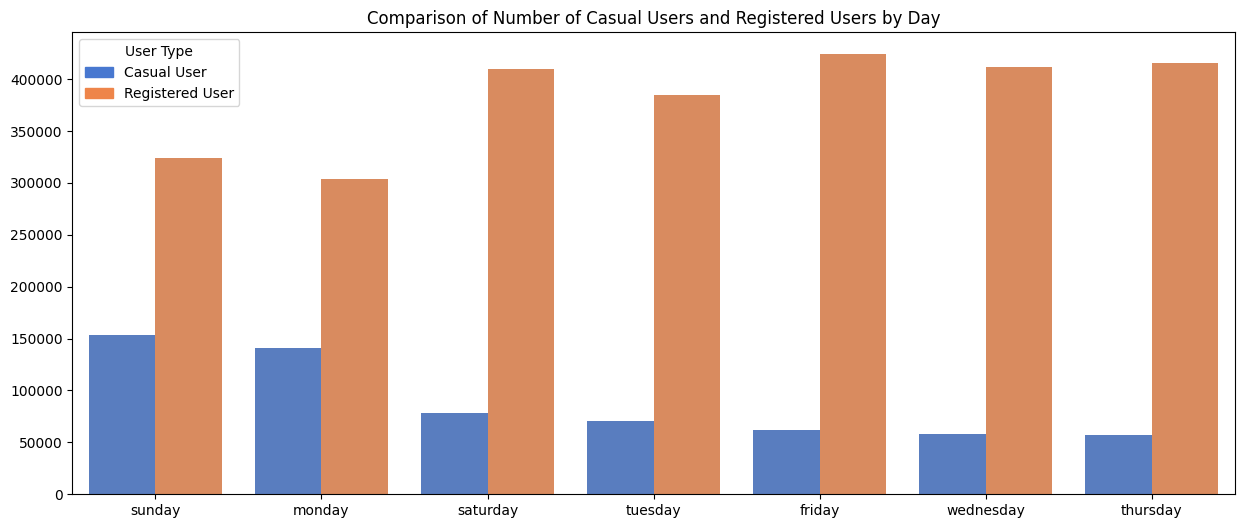

In [101]:
plt.figure(figsize=(15, 6))


sns.barplot(x="day", y="user_count", hue="user_type", data=daily_user_type, palette="muted")
plt.ylabel(None)
plt.xlabel(None)
plt.title("Comparison of Number of Casual Users and Registered Users by Day")
casual_patch = mpatches.Patch(color=sns.color_palette("muted")[0], label='Casual User')
registered_patch = mpatches.Patch(color=sns.color_palette("muted")[1], label='Registered User')
plt.legend(handles=[casual_patch, registered_patch], title="User Type")
plt.show()

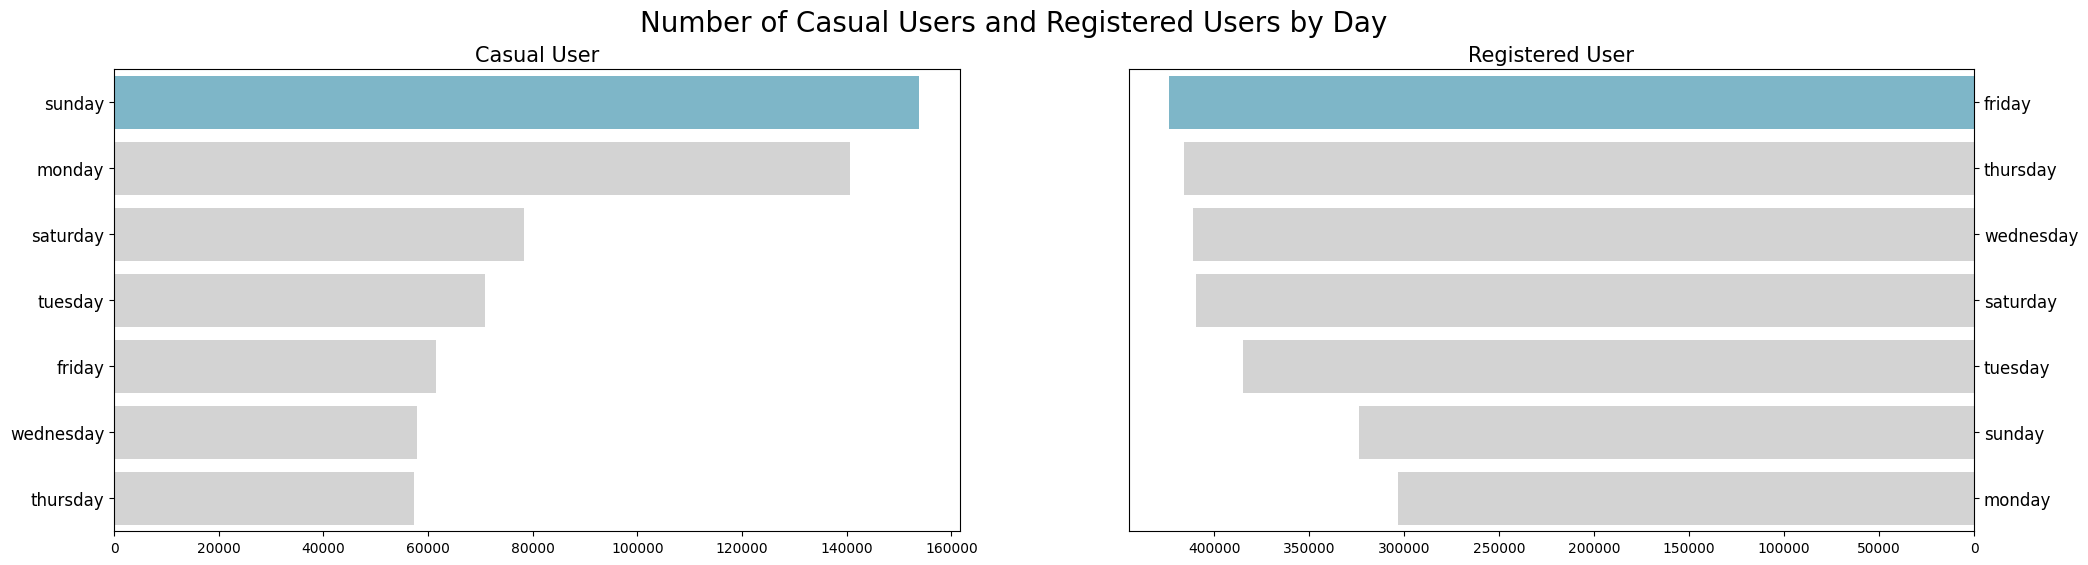

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="casual_user", y="day", data=sum_casual_user, palette=colors, hue="day", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="registered_user", y="day", data=sum_registered_user, hue="day", legend=False, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Registered User", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Number of Casual Users and Registered Users by Day", fontsize=20)
plt.show()

**Jawaban Pertanyaan 1**

Berdasarkan gambar visualisasi di atas, dapat dilihat bahwa di setiap harinya pengguna Bike Sharing dengan tipe "registered-user" memiliki jumlah lebih banyak daripada tipe "casual-user".

Kemudian, apabila menganalisa berdasarkan masing-masing tipe pengguna: 
- Pengguna tipe "casual-user" paling ramai pada hari "Sunday" dengan total 153.852 orang. Dan paling sepi pada hari "Thursday". Hal tersebut menunjukkan bahwa pada hari weekend (Minggu dan Sabtu) banyak pengguna casual menggunakan layanan ini untuk aktivitas rekreasi.

- Sementara itu, pengguna tipe "registered-user" paling ramai pada hari "Friday" dengan total 423.935 orang. Mereka cukup stabil di sepanjang minggu, meskipun terdapat sedikit penurunan pada hari weekend, yang menunjukkan bahwa "registered-user" lebih jarang menggunakan layanan pada hari weekend dibandingkan hari workdays. 

Secara keseluruhan, **registered-user** mendominasi jumlah pengguna pada setiap hari, yang menandakan bahwa banyak pengguna yang berlangganan atau menggunakan layanan secara konsisten.

### Pertanyaan 2: Produktivitas Bike Sharing berdasarkan waktu tertentu (selama 24 jam) di setiap harinya

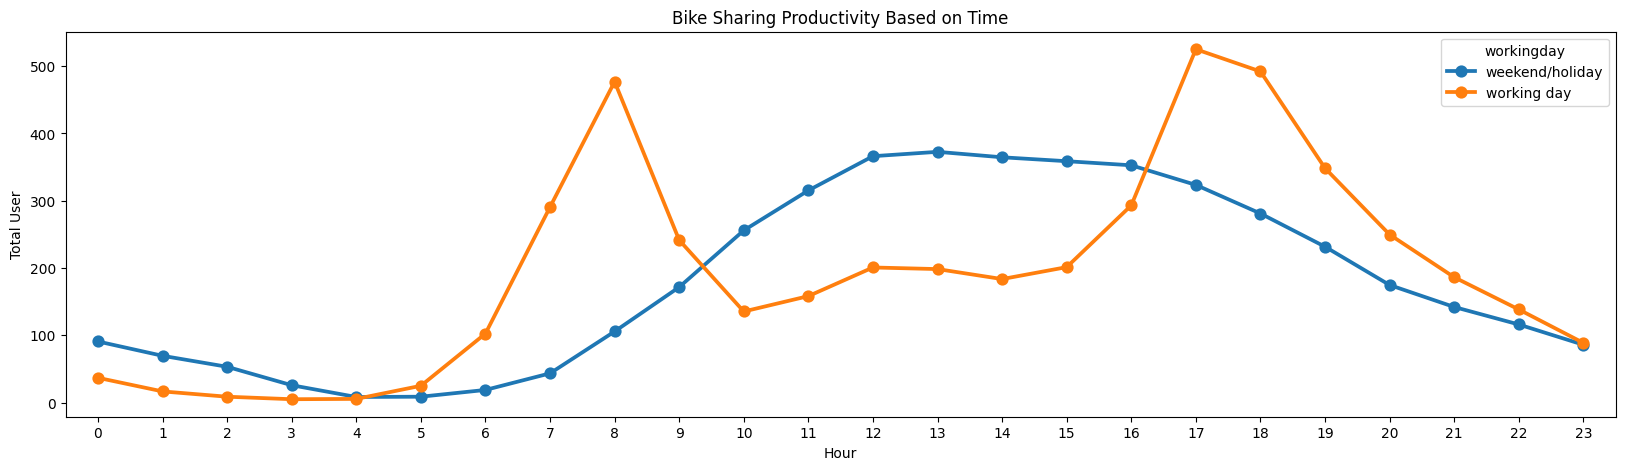

In [103]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hour, x='hour', y='total_user', hue='workingday', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity Based on Time')
ax.set_ylabel('Total User')
ax.set_xlabel('Hour')
plt.show()

**Jawaban Pertanyaan 2**

Berdasarkan visualisasi grafik di atas, terlihat bahwa pada akhir pekan atau hari libur, jumlah pengguna mulai meningkat dari pukul 6 pagi dan terus bertambah hingga mencapai puncaknya pada pukul 1 siang. Namun, setelah pukul 4 sore, jumlah pengguna mulai menurun hingga mencapai titik terendah pada pukul 5 pagi.

Sementara itu, pada hari kerja, jumlah pengguna mengalami peningkatan signifikan saat jam berangkat dan pulang kerja, yaitu antara pukul 6 sampai 8 pagi dan pukul 3 sampai 5 sore. Penurunan jumlah pengguna yang signifikan terjadi pada pukul 9 pagi ketika orang sudah mulai bekerja di kantor, serta pada malam hari mulai pukul 7 malam. Jumlah pengguna cenderung rendah dari tengah malam hingga pukul 5 pagi.

### Pertanyaan 3: Pengaruh Cuaca dan Musim pada jumlah penggunaan Bike Sharing

In [104]:
byweather = hour.groupby("weather").total_user.sum().sort_values(ascending=False).reset_index()
byweather

,weather,total_user
0,clear,2338173
1,mist,795952
2,light snow,158331
3,heavy rain,223


In [105]:
byseason = hour.groupby("season").total_user.sum().sort_values(ascending=False).reset_index()
byseason

,season,total_user
0,fall,1061129
1,summer,918589
2,winter,841613
3,spring,471348


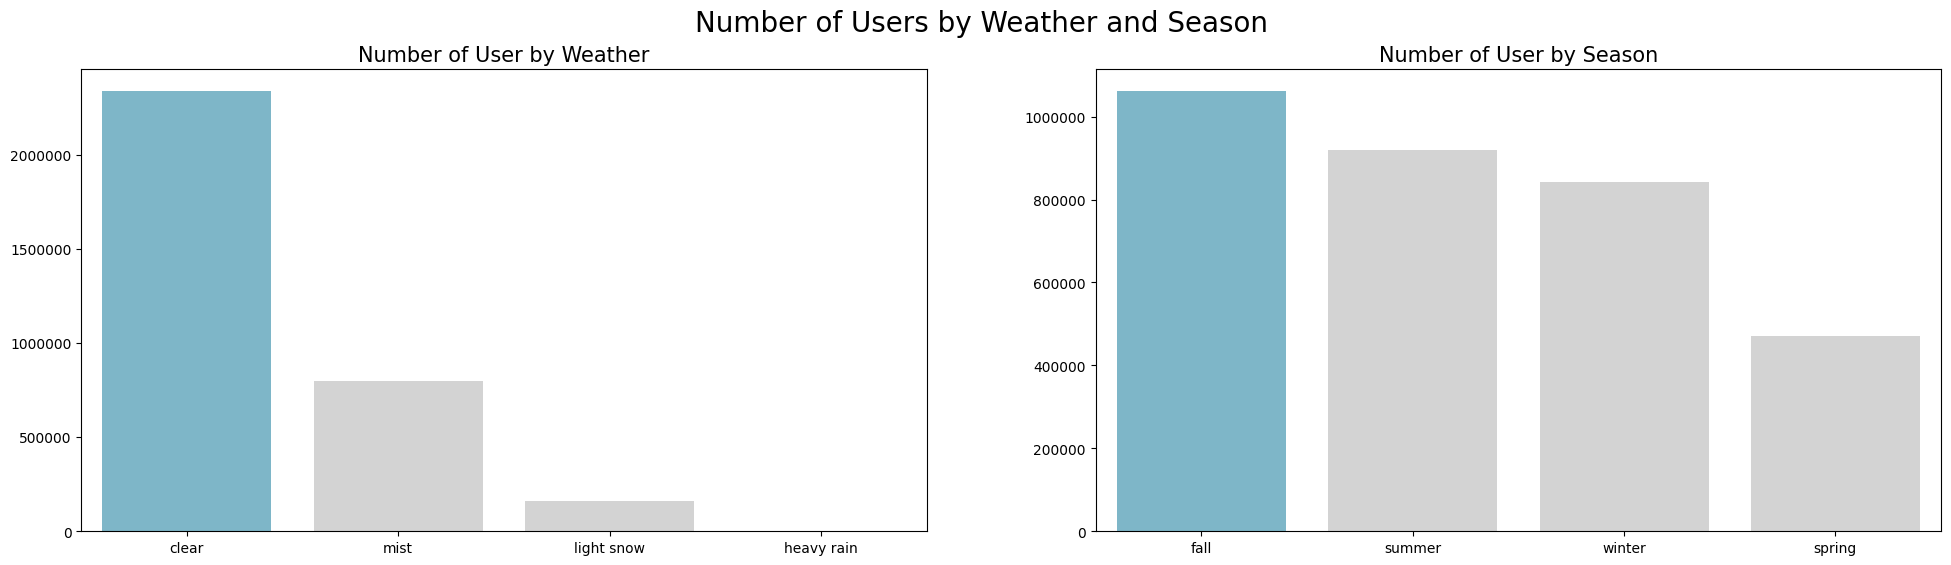

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="total_user", x="weather", data=byweather.sort_values(by="total_user", ascending=False), palette=colors, hue="weather", legend=False, ax=ax[0])
ax[0].set_title("Number of User by Weather", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(y="total_user", x="season", data=byseason.sort_values(by="total_user", ascending=False), palette=colors, hue="season", legend=False, ax=ax[1])
ax[1].set_title("Number of User by Season", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].ticklabel_format(style='plain', axis='y')

plt.suptitle("Number of Users by Weather and Season", fontsize=20)
plt.show()

**Jawaban Pertanyaan 3**

Berdasarkan visualisasi grafik di atas, menunjukkan bahwa kondisi cuaca sangat mempengaruhi jumlah penggunaan Bike Sharing. Dimana terdapat pengguna yang ramai pada cuaca cerah "cloudy" dengan total 2.338.173 pengguna. Sementara, ketika cuaca hujan deras, bersalju, atau badai "rain/storms/snow" maka jumlah penggunaan Bike Sharing mengalami penurunan drastis dengan hanya 223 pengguna saja.

Kemudian, apabila dianalisa berdasarkan musim "seasons":
- Musim gugur "fall" dan musim panas "summer" memiliki jumlah pengguna tertinggi yaitu mencapai 1.000.000 pengguna, dimana mungkin karena suhu sedang terasa nyaman untuk bersepeda
- Musim dingin "winter" dan musim "semi" memiliki jumlah pengguna terendah, yaitu di bawah 500.000 pengguna, dimana mungkin disebabkan cuaca dingin atau cuaca yang masih tidak menentu membatasi aktivitas pengguna untuk bersepeda.

## RFM Analysis

In [107]:
rfm_df = day.groupby(by="day", as_index=False).agg({
    "date": "max", # retrieve the date of the last order
    "instant": "nunique", # calculate the order quantity
    "total_user": "sum" # calculate the amount of revenue generated
})

rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]

# calculates when the customer last made a transaction (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,day,frequency,monetary,recency
0,friday,104,485395,4
1,monday,105,444027,1
2,saturday,104,487790,3
3,sunday,105,477807,2
4,thursday,104,473048,5
5,tuesday,105,455503,0
6,wednesday,104,469109,6


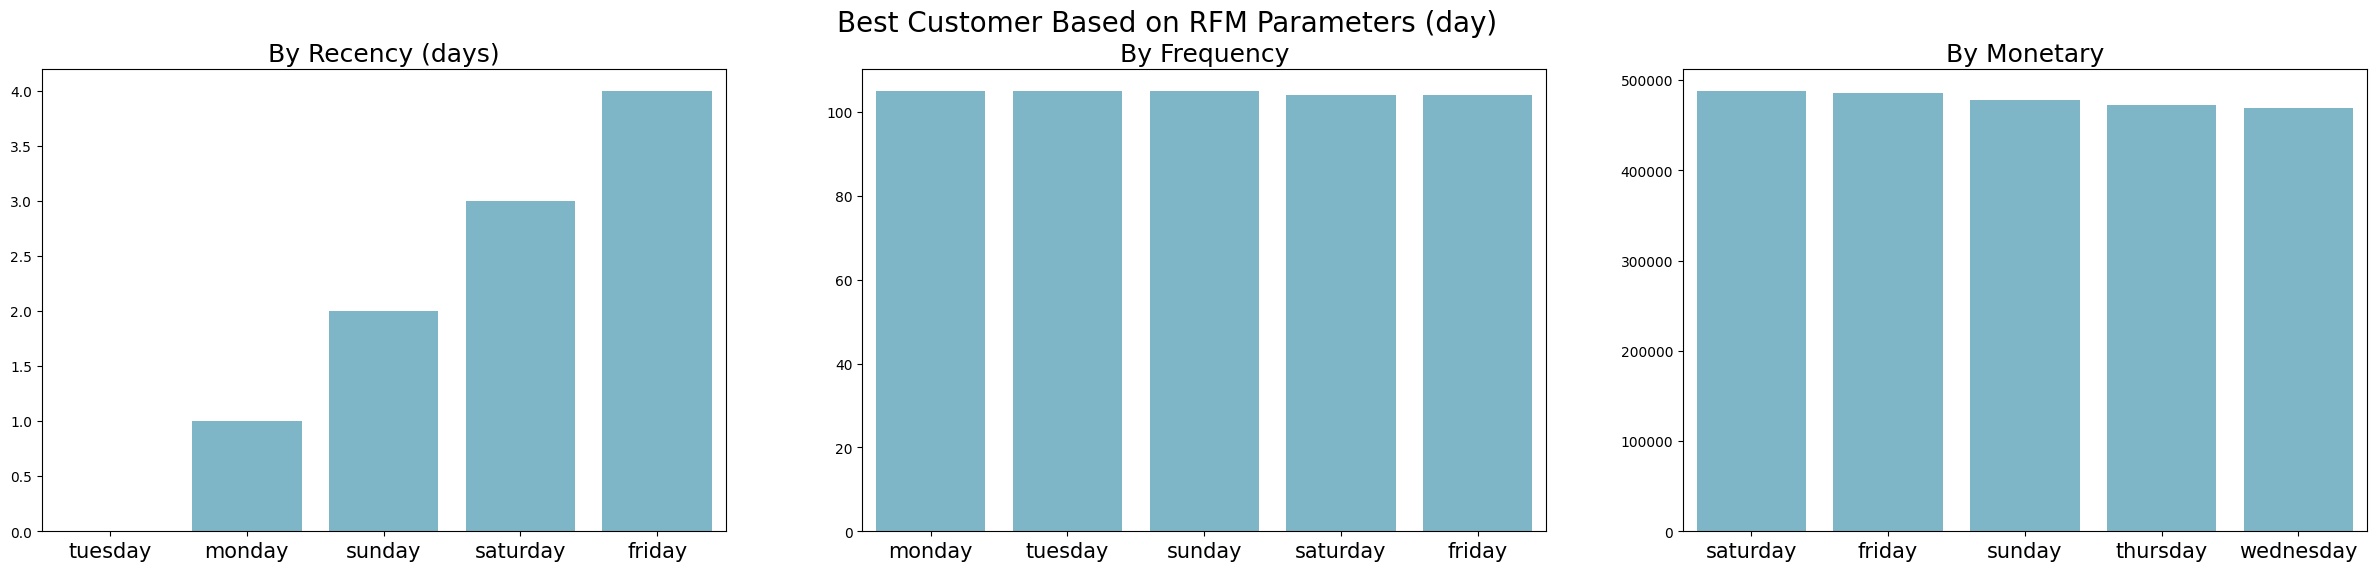

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="day", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="day", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="day", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="day", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="day", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="day", legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)
plt.show()


## Conclusion

- **Dominasi Registered User**: Pengguna registered-user mendominasi penggunaan layanan Bike Sharing setiap hari dibandingkan casual-user, dengan total penggunaan yang lebih tinggi secara konsisten.
- **Kegiatan Rekreasi Casual User**: Pengguna casual-user lebih banyak menggunakan layanan pada hari Minggu, menunjukkan bahwa mereka lebih aktif pada akhir pekan untuk aktivitas rekreasi.
- **Penggunaan Konsisten Registered User**: Pengguna registered-user lebih stabil sepanjang minggu, dengan puncak tertinggi pada hari Jumat, dan sedikit penurunan pada akhir pekan, mengindikasikan bahwa mereka lebih sering menggunakan layanan untuk keperluan rutin.
- **Pengaruh Waktu Kerja pada Pengguna**: Pada hari kerja, peningkatan signifikan terjadi saat jam berangkat dan pulang kerja (pukul 6-8 pagi dan 3-5 sore), sementara penurunan terjadi setelah jam kerja dimulai (9 pagi) dan pada malam hari setelah pukul 7 malam.
- **Cuaca Cerah Menarik Pengguna**: Pengguna lebih banyak bersepeda pada cuaca cerah, sementara kondisi cuaca ekstrem seperti hujan deras atau badai membuat penggunaan turun drastis.
- **Pengaruh Musim Terhadap Penggunaan**: Musim gugur dan musim panas menjadi musim dengan jumlah pengguna terbanyak, sementara musim dingin dan musim semi memiliki jumlah pengguna terendah, menunjukkan bahwa suhu yang lebih nyaman mendukung aktivitas bersepeda.

### Export Clean Dataset

In [109]:
day.to_csv("dashboard/main_data.csv", index=False)

In [110]:
hour.to_csv("hour_clean.csv", index=False)
day.to_csv("day_clean.csv", index=False)

- Mengexport data csv yang sudah diproses dan dirapihkan ke dalam file csv baru yaitu **"main_data"** di folder dashboard untuk nantinya menjadi sumber dataset dari visualisasi data yang ditampilkan di dashboard streamlit.
- Mengexport juga masing-masing data **day.csv** dan **hour.csv** yang sudah clean (rapih) ke dalam file csv baru.